In [362]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import random
from selenium import webdriver

# define empty df to be populated
df_out = pd.DataFrame()

# loop over URL, exploiting "start=" which has increments of 10
for j in range(0,1000,10):
    # launch browser
    driver = webdriver.Chrome('/Users/eren/Downloads/chromedriver')
    # direct browser to page
    # settings: Data Analyst, NY, radius 35 miles
    driver.get('https://www.indeed.com/jobs?q=data+analyst&l=New+York%2C+NY&&radius=35&start={}'.format(j))

    # define list objects
    titles=[]
    companies=[]
    locations=[]
    salaries=[]
    descriptions=[]
    dates=[]

    # search for "jobTitle" class for job title
    title_elements = driver.find_elements('xpath',"//*[contains(@class, 'jobTitle')]")
    # search for "companyName" class for company name
    company_elements = driver.find_elements('xpath',"//*[contains(@class, 'companyName')]")
    # get divs that have class = "companyLocation" for location
    location_elements = driver.find_elements('xpath','//div[@class="companyLocation"]')
    # get "resultContent" class, which is higher level due to possibility of missing salary entries
    salary_elements = driver.find_elements('xpath',"//*[contains(@class, 'resultContent')]")
    # search for "job-snippet" class for description
    description_elements = driver.find_elements('xpath',"//*[contains(@class, 'job-snippet')]")
    # get spans with "date" class
    date_elements = driver.find_elements('xpath','//span[@class="date"]')

    # 15 postings on each page, append all content together
    for i in range(15):
        titles.append(title_elements[i].text)
        companies.append(company_elements[i].text)
        locations.append(location_elements[i].text)
        # if condition takes care of postings with no salary reported
        if re.findall('\$.+?a year',salary_elements[i].text):
            salaries.append(re.findall('\$.+?a year',salary_elements[i].text)[0])
        descriptions.append(description_elements[i].text)
        dates.append(date_elements[i].text.split('\n')[1])

    # create a df with current page data
    df_current = pd.DataFrame([titles,companies,locations,salaries,descriptions,dates]).T # transpose for format
    # concatenate with big df
    df_out = pd.concat([df_out,df_current])
    
    # close current browser instance
    driver.quit()
    # wait between 2-3 seconds
    time.sleep(random.uniform(2,3))

# set df names, reset index
df_out.columns = ['title','company','location','salary','description','date']
df_out.reset_index(drop=True,inplace=True)

/var/folders/cx/rmycmzb94blbhzklstnxrkyc0000gn/T/ipykernel_9457/3002569277.py:9: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('/Users/eren/Downloads/chromedriver')
/var/folders/cx/rmycmzb94blbhzklstnxrkyc0000gn/T/ipykernel_9457/3002569277.py:9: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('/Users/eren/Downloads/chromedriver')
/var/folders/cx/rmycmzb94blbhzklstnxrkyc0000gn/T/ipykernel_9457/3002569277.py:9: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('/Users/eren/Downloads/chromedriver')
/var/folders/cx/rmycmzb94blbhzklstnxrkyc0000gn/T/ipykernel_9457/3002569277.py:9: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('/Users/eren/Downloads/chromedriver')
/var/folders/cx/rmycmzb94blbhzklstnxrkyc0000gn/T/ipykern

In [363]:
df_out

,title,company,location,salary,description,date
0,Board Certified Behavior Analyst (BCBA),Kids of New York Applied Behavior Analysis (Br...,"Manhattan, NY","$80,000 - $90,000 a year",Continuously analyze data and implement progra...,Active 7 days ago
1,Compensation Analyst,Brooke St. Staffing,"Bronx, NY","$85,000 - $105,000 a year",Minimum 5 years of experience in employee comp...,Posted 2 days ago
2,Business Analyst,Jobot,"Remote in New York, NY","$110,000 - $115,000 a year","As a Permanent Business Analyst, you will be r...",Just posted
3,Entry Level EDI Analyst,FOCO,"Piscataway, NJ 08854","$40,000 - $45,000 a year",Coordinate and monitor daily EDI data exchange...,Active 6 days ago
4,Junior Data Analyst,Michael Page,"Hybrid remote in New York, NY 10174","$80,000 - $100,000 a year",Experience presenting data to stakeholders.\n1...,Posted 30+ days ago
...,...,...,...,...,...,...
1495,Data Analyst - Medicaid,Peraton,Remote in United States,None,Bachelors and 5-7 years experience or Masters ...,Posted 13 days ago
1496,Claims Data Analyst III,"AmTrust Financial Services, Inc.",Remote in United States,None,Prior experience in reporting and data visuali...,Posted 30+ days ago
1497,Systems Administrator / Business Analyst,Peraton,Remote in United States,None,The candidate will provide tier 1 & 2 case adm...,Posted 8 days ago
1498,Systems Analyst - Data Warehouse,ENEL,United States,None,3-5+ years of experience in a role with simila...,Posted 30+ days ago


In [369]:
# Top 10 positions
print(df_out.title.value_counts()[0:10])

Business Analyst                                            115
Data Analyst                                                107
Senior Business Analyst                                      67
Data Analyst (HR/Recruiting)                                 42
Senior Business Analyst - With Deep FX Market Experience     36
Data Analyst - Medicaid                                      36
Senior Data Analyst                                          35
Senior Procurement Analyst (Technology/Software)             32
Business Analyst (Customer Acquisition and Services)         30
IT Business Analyst (DevOps)                                 25
Name: title, dtype: int64


In [370]:
# Top 10 companies that are hiring
print(df_out.company.value_counts()[0:10])

Polestar                        52
Peraton                         45
TSR Consulting Services, Inc    44
IEEE Corporate                  36
Riskcare                        36
MongoDB                         33
The Forum Group                 33
proit-inc                       26
The Judge Group                 21
NYC Health + Hospitals          19
Name: company, dtype: int64


In [461]:
# salary data can be cleaned further (not required on exam)
# let's go for the average of two numbers, a crude but ok measure
salary_av = []
for i in range(len(df_out)):
    # take care of missing salary
    if df_out.salary[i] == None:
        salary_av.append(np.nan)
    # take care of single salary value reported
    elif len(re.findall('\$(\d+)',df_out.salary[i])) == 1:
        salary_av.append(int(re.findall('\$(\d+)',df_out.salary[6])[0]))
    # take the average of lower and upper bound for salary
    else:
        salary = re.findall('\$(\d+)',df_out.salary[i])
        salary_l = int(salary[0])
        salary_h = int(salary[1])
        salary_av.append((salary_l + salary_h)/2)

In [463]:
# assign it as a new variable in the main df
df_out['salary_av'] = salary_av

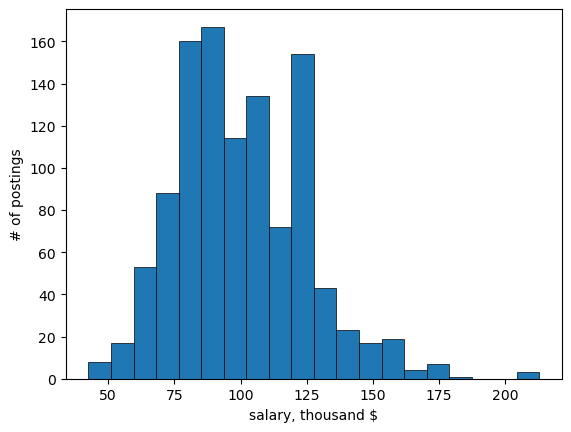

In [487]:
import matplotlib.pyplot as plt
plt.hist(df_out.salary_av,edgecolor='black',linewidth=.5,bins=20)
plt.ylabel('# of postings')
plt.xlabel('salary, thousand \$')
plt.show()

In [488]:
# note 416 postings didn't have the salary reported
np.sum(df_out.salary.isna()==True)*1

416

In [494]:
# companies that are paying the highest
df_out.groupby('company').salary_av.mean().sort_values(ascending=False)[0:11]

company
TikTok                              181.0
Verizon                             178.0
AmTrust Financial Services, Inc.    171.5
Empassion                           171.0
Fidelis Care                        171.0
Triangle Workforce                  165.0
SitusAMC                            160.0
Visual Citi                         157.5
L & M DEVELOPMENT PARTNERS LLC      157.5
CINQCARE                            156.5
Exzac, Inc.                         155.0
Name: salary_av, dtype: float64

In [557]:
# most common words in the "short" job description
# let's remove stopwords such as and, to, of, etc.
words = df_out.description.str.replace('and', '')\
.str.replace(' to ', '')\
.str.replace(' of ', '')\
.str.replace(' in ', '')\
.str.replace(' a ', '')\
.str.replace(' the ', '')\
.str.replace(' for ', '')\
.str.replace(' or ', '')\
.str.replace(' of ', '')\
.str.replace(' on ', '')\
.str.replace(' is ', '')\
.str.replace('The ', '')\
.str.split(expand=True).stack().value_counts()
print(words[0:10])

data            1077
with             470
years            283
business         230
will             212
experience       155
Business         143
(Preferred).     117
role             107
Analyst          103
dtype: int64
